In [1]:
from datetime import datetime
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *
import fastai
import gc
import torch


import numpy as np

nimages_in_sample = 1000


In [2]:
data = 'frank'
path = f'../data/{data}/Training_Set'
path2 = None

In [3]:
image_files = get_image_files(path)

def get_test_fnames(a):
    return random.sample(image_files, nimages_in_sample)

In [4]:
# cleaner = None
# test_learn = None
# inputs = None
# preds = None
# interp = None
# targs = None
# decoded = None
# losses = None
# # learn = None
# gc.collect()

In [5]:
num = 7
num_epochs = 40
num_pred_runs = 5
RUN_NAME='20210122-0037 - arch=xresnet50_deep - samples=3000 frozen=1 epochs=40 bs=16 res=360 _data=external'
RESOLUTION = 360
BATCH_SIZE=32

accd = dict()

for ep in range(10, num_epochs):
    acc_list = []
    print(f'\n\nEPOCH #{ep}')
    
    for pr in range(1, num_pred_runs+1):

        test_learn = load_learner(f'../models/{RUN_NAME}.pkl', cpu=False)
        load_model(f'models/{RUN_NAME}_{ep}.pth', test_learn, opt=Adam, with_opt=False)



        test_db = DataBlock(
            blocks=(ImageBlock, CategoryBlock), 
            get_items=get_test_fnames,
            get_y=parent_label, 
            item_tfms=Resize(RESOLUTION, method='bilinear')) #,
        #     item_tfms=CropPad(RESOLUTION, pad_mode='zeros'))
        #    ,    batch_tfms=aug_transforms(do_flip=True, size=RESOLUTION, batch=False, max_zoom=1.0, mult=1, pad_mode='zeros'))


        dls = test_db.dataloaders(path, bs=BATCH_SIZE)

        test_dl = dls.test_dl(get_test_fnames(''), with_labels=True)

        with test_learn.no_bar():
            inputs, preds, targs, decoded, losses = test_learn.get_preds(dl=test_dl, with_input=True, with_decoded=True, with_loss=True)

        acc_list.append(accuracy(preds, targs))
        print(f'pred_run: {pr}, accuracy: {round(np.float(100* accuracy(preds, targs)))}%')
    
    accd[ep] = np.mean(acc_list)
    print(f'AVERAGE ACCURACY:      {round(100*np.mean(acc_list))}%')
    





EPOCH #10
pred_run: 1, accuracy: 45%
pred_run: 2, accuracy: 48%
pred_run: 3, accuracy: 51%
pred_run: 4, accuracy: 48%
pred_run: 5, accuracy: 48%
AVERAGE ACCURACY:      48%


EPOCH #11
pred_run: 1, accuracy: 51%
pred_run: 2, accuracy: 48%
pred_run: 3, accuracy: 49%
pred_run: 4, accuracy: 48%
pred_run: 5, accuracy: 48%
AVERAGE ACCURACY:      49%


EPOCH #12
pred_run: 1, accuracy: 50%
pred_run: 2, accuracy: 51%
pred_run: 3, accuracy: 50%
pred_run: 4, accuracy: 49%
pred_run: 5, accuracy: 49%
AVERAGE ACCURACY:      50%


EPOCH #13
pred_run: 1, accuracy: 49%
pred_run: 2, accuracy: 50%
pred_run: 3, accuracy: 49%
pred_run: 4, accuracy: 50%
pred_run: 5, accuracy: 50%
AVERAGE ACCURACY:      50%


EPOCH #14
pred_run: 1, accuracy: 49%
pred_run: 2, accuracy: 48%
pred_run: 3, accuracy: 51%
pred_run: 4, accuracy: 47%
pred_run: 5, accuracy: 48%
AVERAGE ACCURACY:      48%


EPOCH #15
pred_run: 1, accuracy: 54%
pred_run: 2, accuracy: 53%
pred_run: 3, accuracy: 52%
pred_run: 4, accuracy: 54%
pred_run: 

In [6]:
print('\n   Best Run ')
print('--------------')
print(f'Epoch #:   {max(accd, key=accd.get)}\nAccuracy:  {round(100*max(accd.values()))}%')


   Best Run 
--------------
Epoch #:   30
Accuracy:  61%


<br>
<br>

####  Get the Inferrences on the Test Set with the highest score

In [11]:

# test_learn = load_learner(f'../models/{RUN_NAME}.pkl', cpu=False)
load_model(f'models/{RUN_NAME}_{max(accd, key=accd.get)}.pth', test_learn, opt=Adam, with_opt=False)



test_db = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_test_fnames,
    get_y=parent_label, 
    item_tfms=Resize(RESOLUTION, method='bilinear')) #,
#     item_tfms=CropPad(RESOLUTION, pad_mode='zeros'))
#    ,    batch_tfms=aug_transforms(do_flip=True, size=RESOLUTION, batch=False, max_zoom=1.0, mult=1, pad_mode='zeros'))


dls = test_db.dataloaders(path, bs=BATCH_SIZE)

test_dl = dls.test_dl(get_test_fnames(''), with_labels=True)

with test_learn.no_bar():
    inputs, preds, targs, decoded, losses = test_learn.get_preds(dl=test_dl, with_input=True, with_decoded=True, with_loss=True)

In [12]:
interp = ClassificationInterpretation(dl=test_dl, inputs=inputs, preds=preds, targs=targs, decoded=decoded, losses=losses )

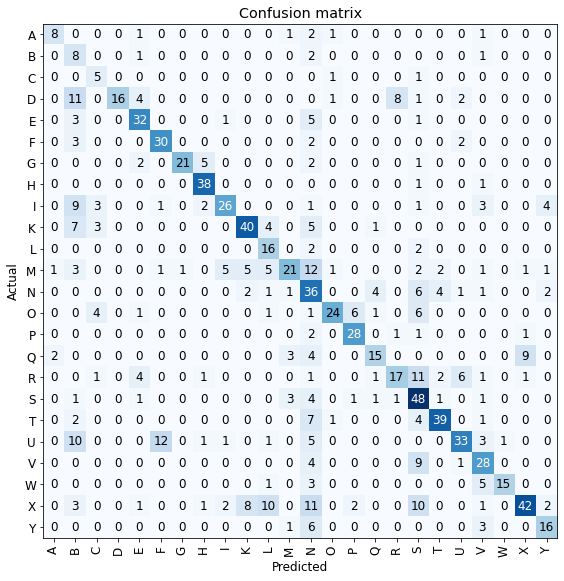

In [13]:
interp.plot_confusion_matrix(figsize=(8,8))

In [14]:
interp.most_confused()[:10]

[('M', 'N', 12),
 ('U', 'F', 12),
 ('D', 'B', 11),
 ('R', 'S', 11),
 ('X', 'N', 11),
 ('U', 'B', 10),
 ('X', 'L', 10),
 ('X', 'S', 10),
 ('I', 'B', 9),
 ('Q', 'X', 9)]

<br>
<br>

## Classification Report

In [15]:
interp.print_classification_report()

              precision    recall  f1-score   support

           A       0.73      0.57      0.64        14
           B       0.13      0.67      0.22        12
           C       0.31      0.71      0.43         7
           D       1.00      0.37      0.54        43
           E       0.68      0.76      0.72        42
           F       0.68      0.81      0.74        37
           G       0.95      0.68      0.79        31
           H       0.79      0.95      0.86        40
           I       0.74      0.52      0.61        50
           K       0.73      0.67      0.70        60
           L       0.41      0.80      0.54        20
           M       0.70      0.34      0.46        62
           N       0.31      0.62      0.41        58
           O       0.83      0.55      0.66        44
           P       0.76      0.85      0.80        33
           Q       0.65      0.45      0.54        33
           R       0.63      0.37      0.47        46
           S       0.46    